# 0. Introduccion

## 0.1. Datos de notebook
### Sección: FUNDAMENTOS DE MACHINE LEARNING_003D
### Integrantes:
- Fabian Muñoz
- Matias Perez
- Gabriel Soto

## 0.2. Cargamos librerias y datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.git', 'column_2C_weka.csv', 'et_ml.ipynb', 'requeriments.txt']


### El csv los cargamos de manera local debido a que no usaremos collab

In [2]:
name= "column_2C_weka.csv"
df = pd.read_csv(name,sep=";")

paraConvertir = ['incidencia_pelvica', 'inclinacion_pelvica', ' angulo_lordosis_lumbar', 'pendiente_sacra', 'radio_pelvico', 'grado_espondilolistesis']

def ConvertirAFloat(df, columna):
    df[columna] = df[columna].str.replace(',', '.').astype(float)
    return df

for columna in paraConvertir:
    df = ConvertirAFloat(df, columna)

df.head(10)

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis,clase
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Anormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Anormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Anormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Anormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Anormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Anormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Anormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Anormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Anormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Anormal


# 1. Analisis exploratorio de los datos (EDA)

## 1.1. Verificar que la columna Clase sólo tenga las categorías Normal y Anormal

In [3]:
df_clase = df[df['clase'].isin(['Anormal', 'Normal'])]
df_clase['clase'].value_counts()

clase
Anormal    210
Normal     100
Name: count, dtype: int64

<span style="color:lime">Podemos notar que entre las 2 clases existen 310 casos, los cuales 210 son anormales y 100 son normales</span>

## 1.2. Efectúe Análisis de Valores Perdidos (missing values) y corríjalos, si procede.
 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incidencia_pelvica       310 non-null    float64
 1   inclinacion_pelvica      310 non-null    float64
 2    angulo_lordosis_lumbar  310 non-null    float64
 3   pendiente_sacra          310 non-null    float64
 4   radio_pelvico            310 non-null    float64
 5   grado_espondilolistesis  310 non-null    float64
 6   clase                    310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
df.isnull().sum()

incidencia_pelvica         0
inclinacion_pelvica        0
 angulo_lordosis_lumbar    0
pendiente_sacra            0
radio_pelvico              0
grado_espondilolistesis    0
clase                      0
dtype: int64

<span style="color:lime">No existen valores perdidos (missing values) o nulos, por lo que no hay necesidad de corregir</span> 

## 1.3.  Presente mediante un heatmat con el estado de las columnas para verificar la corrección aplicada a los valores perdidos, si procede.

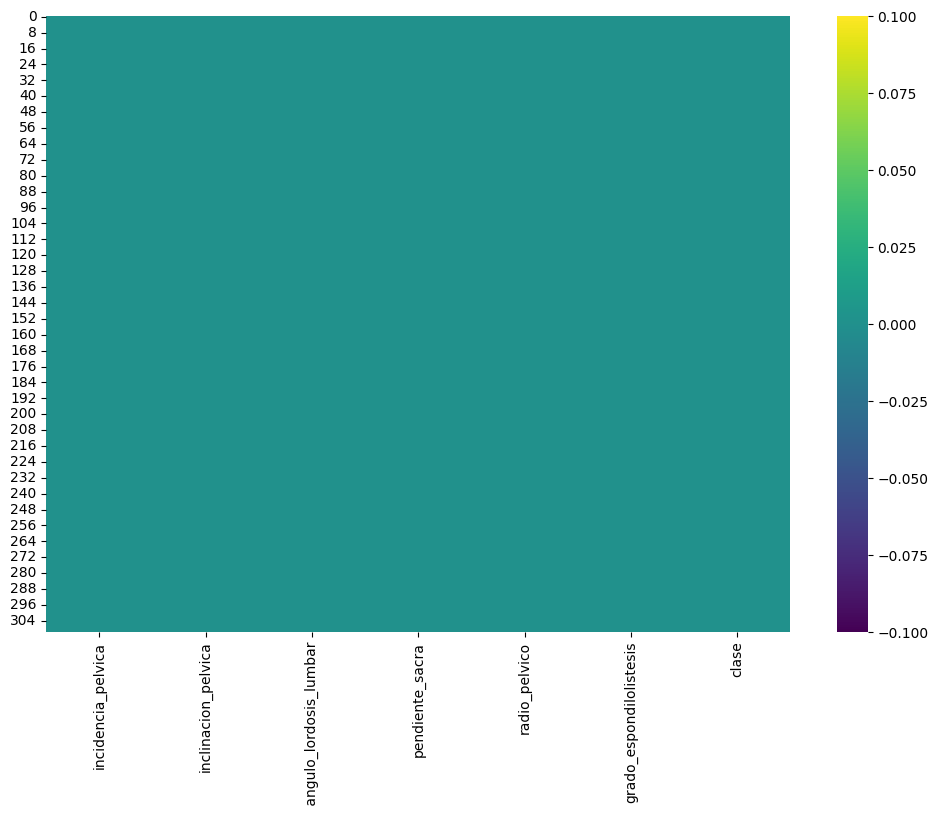

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

<span style="color:lime">Podemos apreciar que no existen valores perdidos en el dataset, ya que todos los campos se encuentran en el rango de color celest, lo que indica que no hay valores perdidos.</span>.

## 1.4. Presente los valores estadísticos descriptivos de las columnas del dataframe

In [7]:
df.describe()

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## 1.5. Presente histograma de cada una de las variables


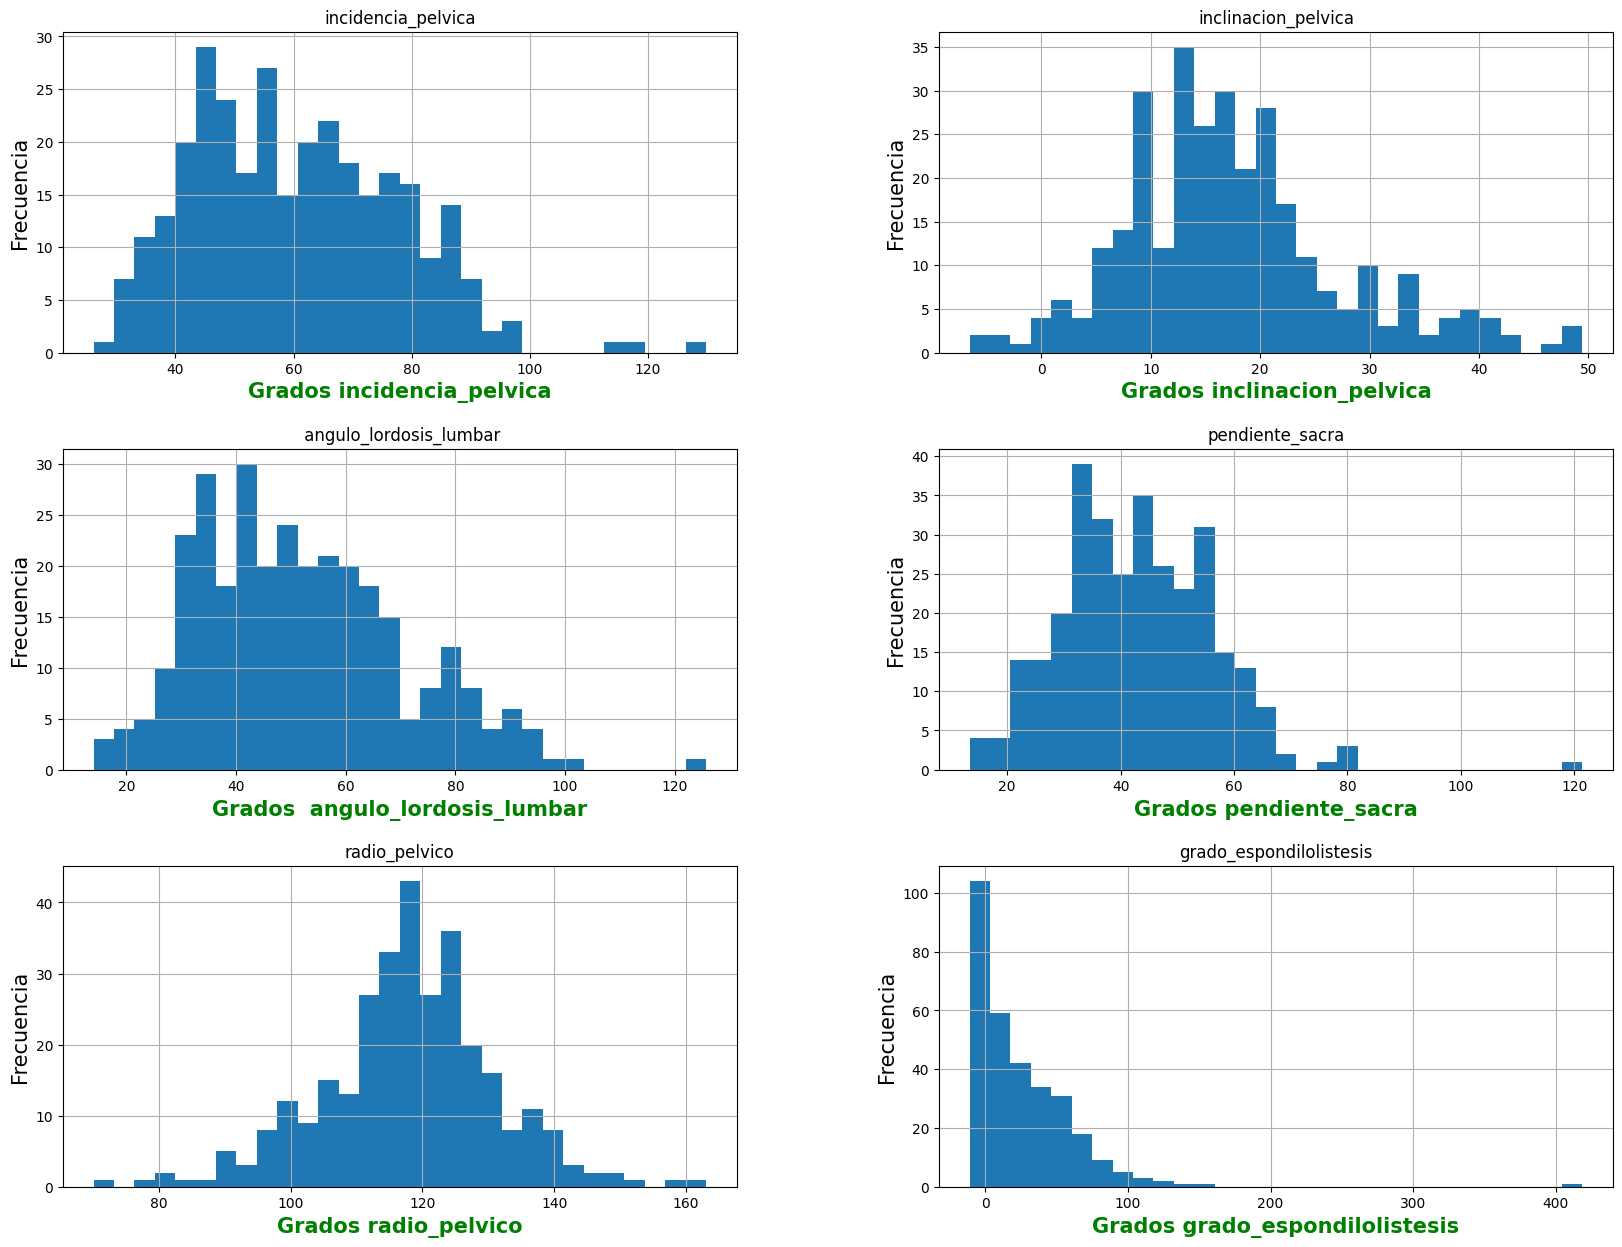

In [8]:
histogramas = df.hist(bins=30, figsize=(20,15))

for histo in histogramas.flatten():
    histo.set_xlabel(f"Grados {histo.get_title()}")
    histo.set_ylabel("Frecuencia")
    histo.xaxis.label.set_color('green')  
    histo.xaxis.label.set_weight('bold')  
    histo.xaxis.label.set_size(15) 
    histo.yaxis.label.set_size(15)

plt.show()

# 2. Análisis

## 2.1. Presente en un histograma como se distribuyen los valores de la columna a predecir

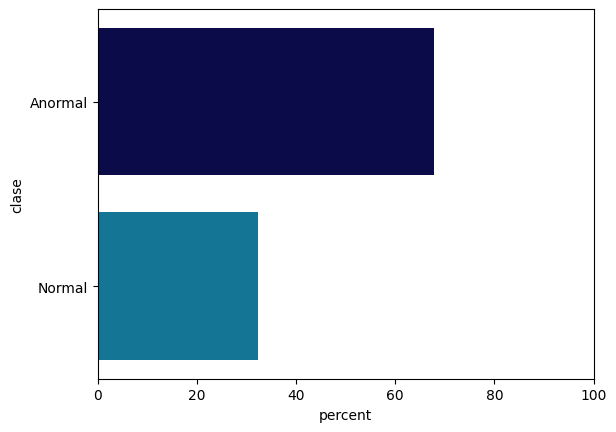

In [9]:
sns.countplot(df['clase'],palette='ocean',stat='percent').set_xlim([0, 100])
plt.show()


## 2.2.  Presente el porcentaje de distribución de cada clase

In [10]:
total = df.clase.value_counts(normalize="true")
print(round(total*100,1))

clase
Anormal    67.7
Normal     32.3
Name: proportion, dtype: float64


## 2.3 Presente la matriz de correlación 
Podemos observar que las variables son muy independientes con ligeras semejanzas con algunas.

<function matplotlib.pyplot.show(close=None, block=None)>

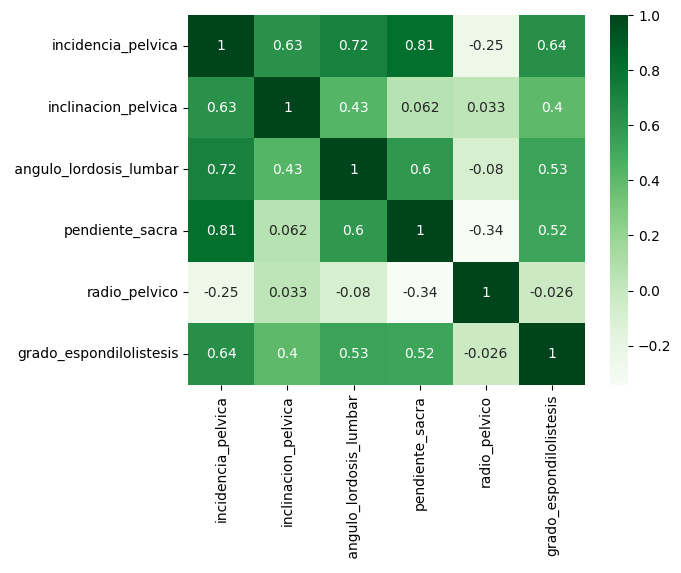

In [11]:
dfSinClase = df[paraConvertir].copy()
correlacion = dfSinClase.corr()
sns.heatmap(correlacion, annot=True, cmap='Greens') # color creeper de maincra xdddddddddd
plt.show

In [12]:
# De ser necesario escale los datos del dataframe (si procede)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dfSinClase)
scaled_features = scaler.transform(dfSinClase)
df_feat = pd.DataFrame(scaled_features,columns=dfSinClase.columns)
df_feat.head()

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


# 3. Preparación de los datos

In [13]:
# 3.1. Particione el dataframe en entrenamiento y prueba
from sklearn.model_selection import train_test_split
predictors = df.drop("clase",axis=1)
clase = df["clase"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,clase,test_size=0.20,random_state=0)
print("datos")
print("-"*25)
print(f"entrenamiento X: {X_train.shape[0]}")
print(f"entrenamiento Y: {Y_train.shape[0]}")
print(f"prueba X: {X_test.shape[0]}")
print(f"prueba Y: {Y_test.shape[0]}")


datos
-------------------------
entrenamiento X: 248
entrenamiento Y: 248
prueba X: 62
prueba Y: 62


# 4. Para cada Modelo (regresión logística, árbol de decisión, bosques de árboles)

## 4.1. Regresión Logística

### 4.1.1.  Cree el modelo

In [14]:
# Cargamos columnas en X, exceptuando la columna a predecir (clase)
# Cargamos la columna a predecir en Y
X = df.drop('clase',axis=1)
Y = df['clase']

### 4.1.2. Entrene y pruebe el modelo

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scalerN = MinMaxScaler()
scalerN.fit(X)
XscaledN = scalerN.transform(X)
regresionLogistica = LogisticRegression(solver='lbfgs')
regresionLogistica.fit(XscaledN, Y)
Y_preddiccion = regresionLogistica.predict(XscaledN)

### 4.1.3. Presente el classification report (precision, f1-score y recall)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y,Y_preddiccion))

              precision    recall  f1-score   support

     Anormal       0.76      0.94      0.84       210
      Normal       0.76      0.38      0.51       100

    accuracy                           0.76       310
   macro avg       0.76      0.66      0.67       310
weighted avg       0.76      0.76      0.73       310



### 4.1.4. Presente la matriz de confusión

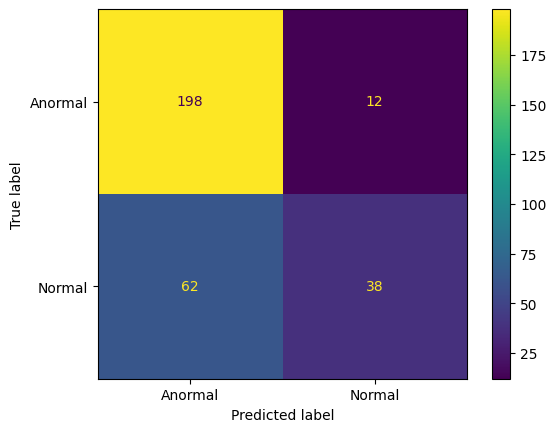

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y, Y_preddiccion)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regresionLogistica.classes_)
display.plot()

### 4.1.5. Calcule y presente el ROC (Receiver Operation Characteristics)

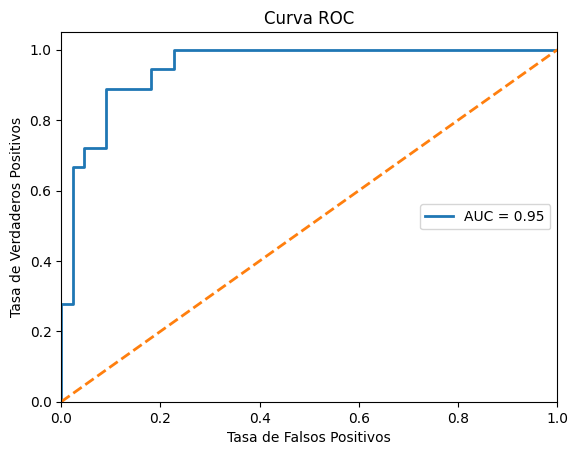

In [18]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y_binario = np.where(Y == 'Normal', 1, 0)
rocX_train, rocX_test, rocY_train, rocY_test = train_test_split(X, y_binario, test_size=0.20, random_state=42)
regresionLogistica.fit(rocX_train, rocY_train)

rocY_probabilidad = regresionLogistica.predict_proba(rocX_test)[: , 1]

fpr, tpr, thresholds = roc_curve(rocY_test, rocY_probabilidad)

area_bajo_curva = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label=f'AUC = {area_bajo_curva:.2f}')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="center right")
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(rocY_test, rocY_probabilidad)


0.9507575757575757

### 4.1.6. Comente el valor obtenido del ROC

Podemos concluir que el area bajo la curva es de un 95.07%, indicando que puede distingir las clases de una manera eficaz y exacta. Estamos considerando el parametro de random_state en 42, Sin embargo, si dejamos este valor definido como uno realmente al azar, este porcentaje puede variar como muy bajo en pocas ocaciones hasta el 87%, y como mucho ha logrado llegar hasta el 97%. Por lo que para poder asegurarnos de que el puntaje sea el mas real posible, usamos el metodo roc_auc_score, el cual nos entrega el valor de area bajo la curva, y asi poder comparar los resultados.

### 4.1.7. De ser necesario, sintonize el modelo

In [20]:
# No es necesario, pero lo hacemos de todas formas para demostrar

from sklearn.model_selection import GridSearchCV

regresionLogistica.fit(X_train, Y_train)
Yhat = regresionLogistica.predict(X_test)
Yprob = regresionLogistica.predict_proba(X_test)

params = {"max_iter": [50,100,150,200],
"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid = GridSearchCV(estimator=regresionLogistica, param_grid=params,cv=5,scoring='accuracy')
grid.fit(X_train, Y_train)

print("Mejores puntuaciones por gridsearchcv")
print(grid.best_score_)
print(grid.best_params_)

Mejores puntuaciones por gridsearchcv
0.8471836734693877
{'max_iter': 50, 'solver': 'newton-cg'}


In [21]:
print("todos los resultados")
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

todos los resultados


mean_fit_time                                       0.078712
std_fit_time                                        0.040367
mean_score_time                                     0.003209
std_score_time                                      0.000503
param_max_iter                                            50
param_solver                                       newton-cg
params               {'max_iter': 50, 'solver': 'newton-cg'}
split0_test_score                                       0.82
split1_test_score                                        0.8
split2_test_score                                       0.82
split3_test_score                                   0.836735
split4_test_score                                   0.959184
mean_test_score                                     0.847184
std_test_score                                      0.057197
rank_test_score                                            1
Name: 0, dtype: object

### 4.1.8. Vuelva a presentar el classification report (precision, f1-score y recall)

In [22]:
Yhat = grid.predict(X_test)
Yprob = grid.predict_proba(X_test)
print(classification_report(Y_test, Yhat))

              precision    recall  f1-score   support

     Anormal       0.85      0.81      0.83        43
      Normal       0.62      0.68      0.65        19

    accuracy                           0.77        62
   macro avg       0.74      0.75      0.74        62
weighted avg       0.78      0.77      0.78        62



## 4.2 Arbol de decisiones


### 4.2.1 Cree el modelo (Para el modelo de Árbol, considere una profundidad de 3)

In [23]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=3)


### 4.2.2 Entrene y pruebe el modelo

[Text(0.625, 0.875, 'grado_espondilolistesis <= 20.085\ngini = 0.44\nsamples = 248\nvalue = [81, 167]'),
 Text(0.5, 0.625, 'radio_pelvico <= 118.066\ngini = 0.476\nsamples = 133\nvalue = [81, 52]'),
 Text(0.25, 0.375, 'pendiente_sacra <= 47.149\ngini = 0.452\nsamples = 55\nvalue = [19, 36]'),
 Text(0.125, 0.125, 'gini = 0.386\nsamples = 46\nvalue = [12, 34]'),
 Text(0.375, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.75, 0.375, 'inclinacion_pelvica <= 17.584\ngini = 0.326\nsamples = 78\nvalue = [62, 16]'),
 Text(0.625, 0.125, 'gini = 0.155\nsamples = 59\nvalue = [54, 5]'),
 Text(0.875, 0.125, 'gini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 115\nvalue = [0, 115]')]

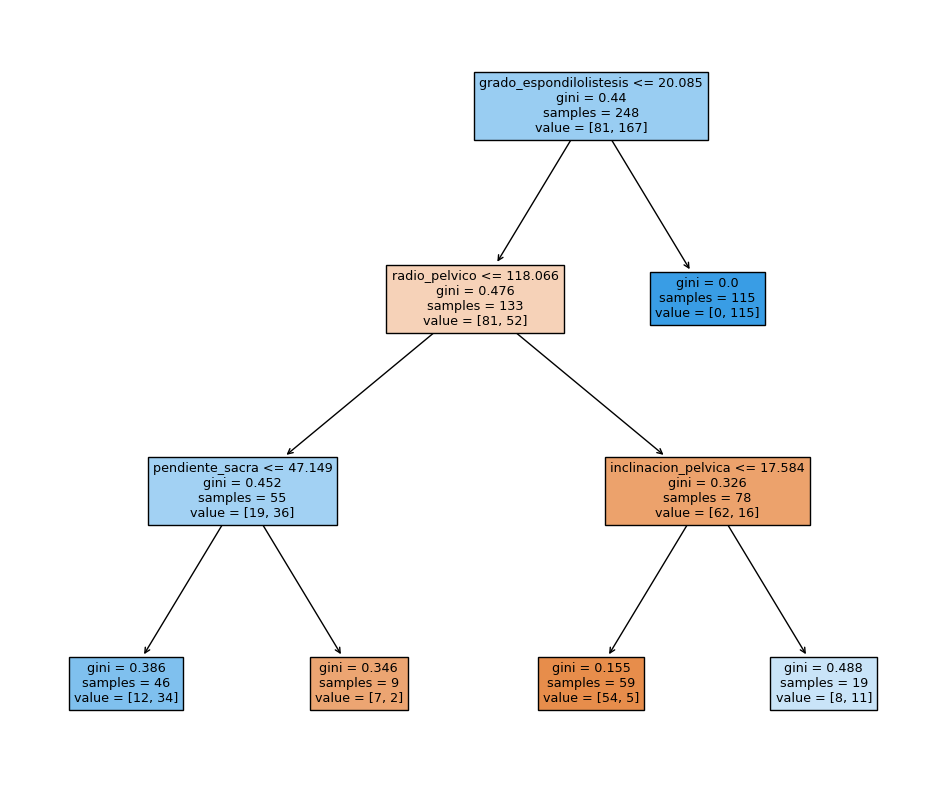

In [24]:
from sklearn.tree import plot_tree
from sklearn.preprocessing import label_binarize
Y_train_binary = label_binarize(Y_train, classes=['Normal', 'Anormal'])
Y_test_binary = label_binarize(Y_test, classes=['Normal', 'Anormal'])
modelo.fit(X = X_train , y= Y_train_binary)
DecisionTreeClassifier()
plt.figure(figsize =(12,10))
plot_tree(decision_tree=modelo, feature_names=X_test.columns, filled=True)

### 4.2.3 Presente el classification report (precision, f1-score y recall)

In [25]:
from sklearn.metrics import classification_report
y_predic = modelo.predict(X_test)
print(classification_report(Y_test_binary,y_predic))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.85      0.81      0.83        43

    accuracy                           0.77        62
   macro avg       0.74      0.75      0.74        62
weighted avg       0.78      0.77      0.78        62



### 4.2.4 Presente matriz de confusión

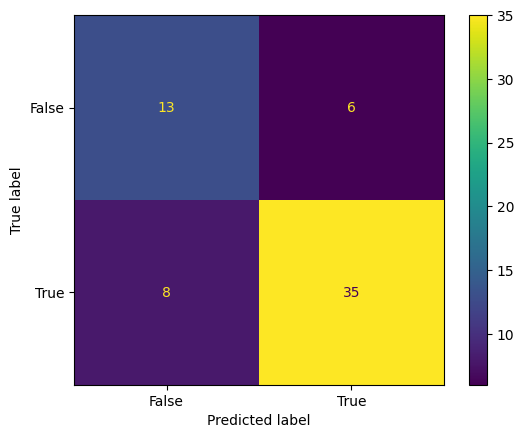

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix_arbol = metrics.confusion_matrix(Y_test_binary, y_predic)
cm_display_arbol = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_arbol, display_labels = [False, True])
cm_display_arbol.plot()
plt.show()

### 4.2.5 Curva ROC

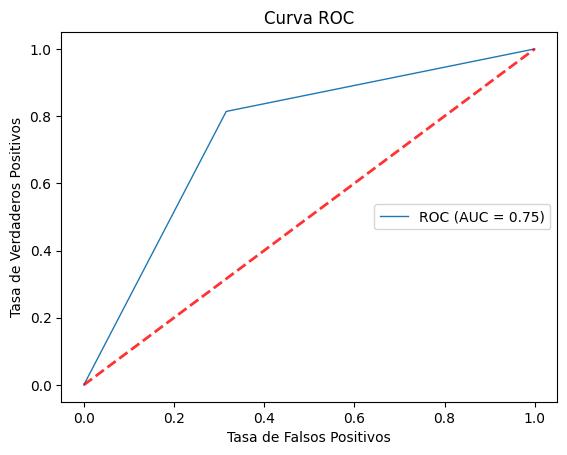

In [27]:
fpr1, tpr1, thresholds1 = roc_curve(Y_test_binary, y_predic)

roc_auc2 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, lw=1 ,label='ROC (AUC = %0.2f)' % (roc_auc2))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="center right")
plt.show()

### 4.2.6 Comente el valor obtenido
El valor arrojado nos indica que el modelo tiene una capacidad moderada para distinguir entre las clases, no es un mal rendimiento, ya que, es superior a 0.5. Pero todavia existe un margen para mejorar si buscamos un rendimiento más alto

### 4.2.7 Sintonize el modelo de ser necesario

[Text(0.6, 0.8333333333333334, 'grado_espondilolistesis <= 20.085\ngini = 0.44\nsamples = 248\nvalue = [81, 167]'),
 Text(0.4, 0.5, 'radio_pelvico <= 118.066\ngini = 0.476\nsamples = 133\nvalue = [81, 52]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.452\nsamples = 55\nvalue = [19, 36]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.326\nsamples = 78\nvalue = [62, 16]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 115\nvalue = [0, 115]')]

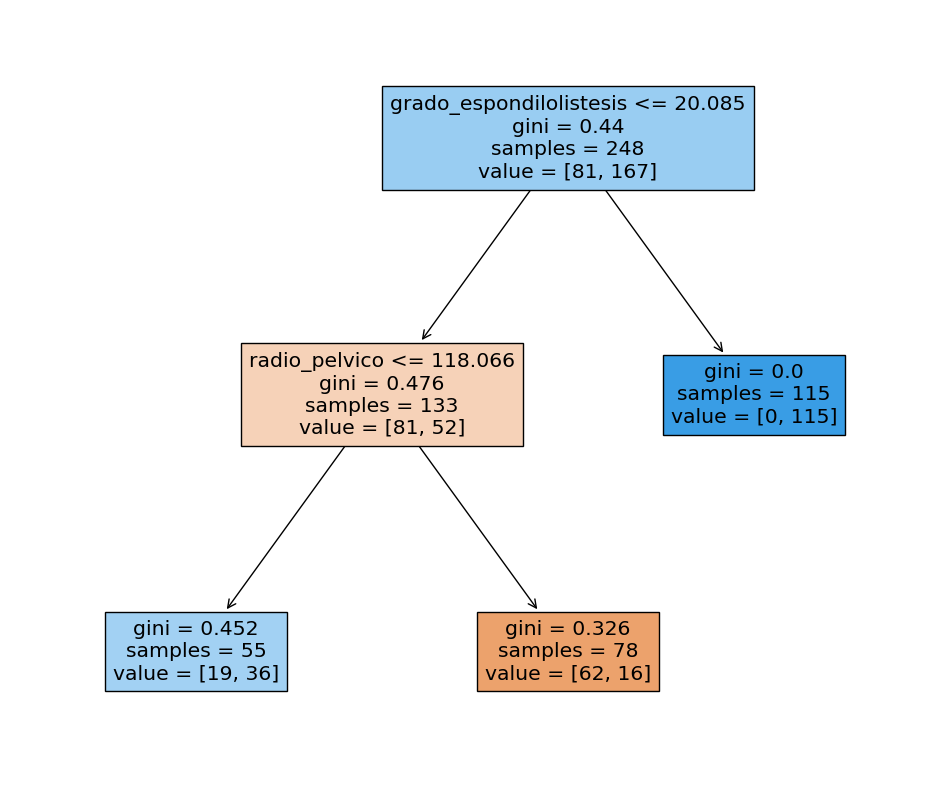

In [28]:
from sklearn.model_selection import GridSearchCV
parametros = {'max_depth': [1,2,3], 'max_leaf_nodes':[1,2,3,4,5]}
modelo2 = DecisionTreeClassifier()
modelo2 = GridSearchCV(modelo2, parametros)
modelo2.fit(X_train, Y_train_binary)
modelo2.best_params_
modelo2 = DecisionTreeClassifier(max_depth= 2, max_leaf_nodes = 3)
modelo2.fit(X_train, Y_train_binary)
plt.figure(figsize =(12,10))
plot_tree(decision_tree=modelo2, feature_names=X_test.columns, filled=True)


### 4.2.8 Reporte de clasificación
Luego de sintonizar el modelo, podemos observar que los "mejores_parametros" arrojados por GridSearchCV no mejoran el rendimiento del Arbol de decisiones, al contrario, arroja peores resultados.

In [29]:
from sklearn.metrics import classification_report
y_predic = modelo.predict(X_test)
y_predic_2 = modelo2.predict(X_test)
print("Modelo original")
print(classification_report(Y_test_binary,y_predic))
print("Modelo sintonizado")
print(classification_report(Y_test_binary,y_predic_2))

Modelo original
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.85      0.81      0.83        43

    accuracy                           0.77        62
   macro avg       0.74      0.75      0.74        62
weighted avg       0.78      0.77      0.78        62

Modelo sintonizado
              precision    recall  f1-score   support

           0       0.54      0.68      0.60        19
           1       0.84      0.74      0.79        43

    accuracy                           0.73        62
   macro avg       0.69      0.71      0.70        62
weighted avg       0.75      0.73      0.73        62



## 4.3. Bosque de árboles

### 4.3.1 - 4.3.2 - 4.3.3 Creación del Modelo / Entrenamiento de datos / Classification report.

In [30]:
#Importamos los necesario para los puntos a realizar de este Modelo que nos servira para realizar las proximas actividades.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

predictors = df.drop("clase", axis=1)
target = df["clase"]

# Dividimos los conjutos de datos en [Entrenamiento] y [Prueba].
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Crear el modelo RandomForestClassifier con 100 arboles, esto lo comentamos para no mostrar el mensaje 100 veces de la creación de arboles.
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenanamos  el modelo en el conjunto de entrenamiento
random_forest.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
predictions = random_forest.predict(X_test)

# Presentar el classification report
report = classification_report(Y_test, predictions)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Anormal       0.88      0.86      0.87        43
      Normal       0.70      0.74      0.72        19

    accuracy                           0.82        62
   macro avg       0.79      0.80      0.79        62
weighted avg       0.83      0.82      0.82        62



### 4.3.4. Matriz de Confusión.

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Classification Report:
               precision    recall  f1-score   support

     Anormal       0.94      0.74      0.83        43
      Normal       0.61      0.89      0.72        19

    accuracy                           0.79        62
   macro avg       0.77      0.82      0.78        62
weighted avg       0.84      0.79      0.80        62



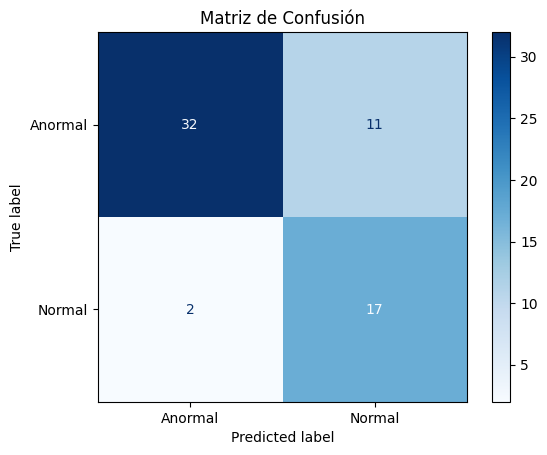

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
 
#Crear el modelo RandomForestClassifier con los hiperparámetros proporcionados
model = RandomForestClassifier(n_estimators=100, class_weight="balanced",
                               max_features='sqrt', verbose=1, max_depth=3,
                               oob_score=True, random_state=50)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Presentar el classification report
report = classification_report(Y_test, predictions)
print("Classification Report:\n", report)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predictions)

# Crear el objeto ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)

# Visualizar la matriz de confusión
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión')
plt.show()

### 4.3.5. Calcular y presentar el ROC (presision, f1-score y recall)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


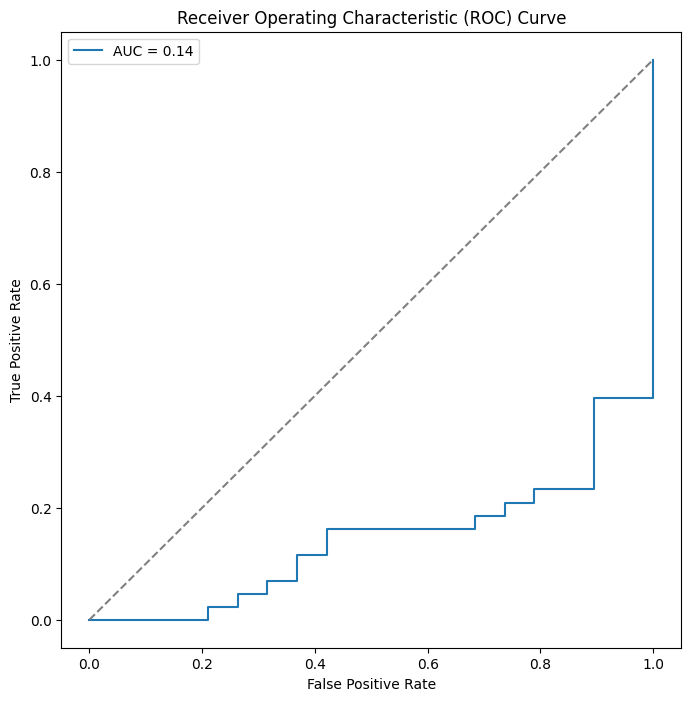

ROC AUC Score: 0.14320685434516522


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]
Y_test_binary = label_binarize(Y_test, classes=['Normal', 'Anormal'])

fpr, tpr, thresholds = roc_curve(Y_test_binary, y_probs)
roc_auc = roc_auc_score(Y_test_binary, y_probs)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc)


### 4.3.6 Comente el valor obtenido.

El valor del Área bajo la Curva (AUC) que hemos obtenido es notablemente bajo, sugiriendo un rendimiento insatisfactorio del modelo. Este indicador, esencial para evaluar la capacidad de discriminación del modelo, revela que está realizando peor que una clasificación aleatoria. En el contexto de la curva ROC, donde un AUC de 0.5 representa la línea base de rendimiento, nuestro valor inferior indica una dificultad considerable en la capacidad del modelo para distinguir entre las clases de interés. 

### 4.3.7 Sintonize el modelo de ser necesario

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

rf_model = RandomForestClassifier()

rf_model.fit(X_train, Y_train)


param_grid = {
    'n_estimators': [100],
    'max_leaf_nodes':[1,2,3,4,5]
}



### 4.3.8 Reporte de clasificación

In [42]:
print("Modelo original")
print(report)
# hace un print que salgan 6 #
print("#"*60)
print("Modelo sintonizado")
y_predic_3 = rf_model.predict(X_test)
print(classification_report(Y_test,y_predic_3))


Modelo original
              precision    recall  f1-score   support

     Anormal       0.94      0.74      0.83        43
      Normal       0.61      0.89      0.72        19

    accuracy                           0.79        62
   macro avg       0.77      0.82      0.78        62
weighted avg       0.84      0.79      0.80        62

############################################################
Modelo sintonizado
              precision    recall  f1-score   support

     Anormal       0.90      0.86      0.88        43
      Normal       0.71      0.79      0.75        19

    accuracy                           0.84        62
   macro avg       0.81      0.82      0.82        62
weighted avg       0.84      0.84      0.84        62



## 5 Ejecute la comparación de Métricas de Exactitud obtenidas por Modelo

In [39]:
precision = []
tipos = ['Decision Trees', 'Logistic Regression', 'Random Forests']
modelos = [DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), RandomForestClassifier(n_estimators=100,
random_state=0)]
for i in modelos:
 model = i
 model.fit(X_train, Y_train_binary)
 score = model.score(X_test, Y_test_binary)
 precision.append(score)


In [40]:
resumen = pd.DataFrame({'accuracy':precision}, index=tipos)
resumen

,accuracy
Decision Trees,0.774194
Logistic Regression,0.774194
Random Forests,0.822581


##  5.1 Indique cual es el mejor y cuál es el peor, justifique.

El mejor modelo es el random forest con una puntuación de 0.82 y los peores son el modelo de regresión logistica y el arbol de decisiones.
Para llegar a esta conclusión nos basamos en el resultado arrojado por las metricas de Exactitud. 